In [84]:
%matplotlib inline
from scipy import io
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

#### Loading train,validate and test set 

In [12]:
data = io.loadmat("ex5data1.mat")
X = data['X']
y = data['y']
X_test = data['Xtest']
y_test = data['ytest']
X_val = data['Xval']
y_val = data['yval']

#### Plot training data for visualization

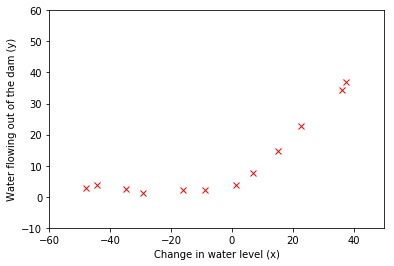

In [32]:
plt.plot(X,y, 'rx')
plt.axis([-60, 50, -10, 60])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

#### Compute regularized linear regression cost function

In [65]:
def ln_regularized(Weights,num_examples, _lbd):
    """
    Input:
        Weights (ndarray) : Model Weights 
        _lbd (float)  : value of regularized term
    Output:
        Regularized (float) 
    """
    Regularized = np.dot(Weights[1:].ravel(), Weights[1:].ravel()) * (_lbd/(2*num_examples))
    return Regularized

In [66]:
def linear_regression_cost(X, y, Weights, _lbd=0):
    """
    Input : X (ndarray) : training set input
            y (ndarray) : training set output
            Weights (ndarray) : model Weights that out cost function based on
            _lbd (float) : model regularized term
            
    Output: Cost (float) : current model cost
    """
    Cost = 0.0
    m, _ = X.shape
    
    hypo = X.dot(Weights)
    Cost = (hypo - y).T.dot(hypo - y) / (2*m)
    Regularized = ln_regularized(Weights, m, _lbd)
    
    return Cost + Regularized

#### Unit test our cost function with weights = [1,1] and $\lambda$=1.This cost should be 303.993

In [67]:
initial_weights = np.array([[1],[1]])
linear_regression_cost(np.insert(X, 0, 1, axis=1), y, initial_weights, 1)

array([[ 303.99319222]])

#### Compute regularized linear regression gradient

In [77]:
def linear_regression_gradient(X, y, Weights, alpha=0.1, _lbd=0):
    """
    Input:
        X (ndarray) : training set input
        y (ndarray) : training set ouput
        Weights (ndarray) : Current model Weights
        alpha (float) : learning rate
        _lbd (float) : regularized term
        
    Output : 
        Weight_grad (ndarray) : gradient of linear regression
    """
    m,_ = X.shape
    Weight_grad = np.zeros(Weights.shape)
    Weight_grad = np.dot(X.T, np.dot(X, Weights) - y) * (alpha/m)
    Weight_grad[1:] +=  Weights[1:] * (_lbd/m)
    
    return Weight_grad

#### Unit test out linear regression gradient function with Weights = [1,1] , $\lambda$=1, and learning rate $\alpha$=1.This value should be [-15.30, 598.250]

In [79]:
initial_weights = np.array([[1],[1]])
linear_regression_gradient(np.insert(X, 0, 1, axis=1), y, initial_weights, alpha=1, _lbd=1)

array([[ -15.30301567],
       [ 598.25074417]])

#### Training linear regression model

In [81]:
def linear_regression_training(X, y, alpha=0.1, _lbd=0, num_iters=200):
    """
    Training linear regression model using gradient descent, to find the optimal weights.
    Input :
            X (ndarray) : training set input
            y (ndarray) : training set output
            _lbd (float) : regularized term
    Output: 
            weights (ndarray) : optimal weights of linear regression model
    """
    
    weights = np.zeros((X.shape[1], 1))
    
    for i in range(num_iters):
        weights -= linear_regression_gradient(X, y, weights, alpha, _lbd)
                       
    return weights

#### Scale training set to make it have zero mean and unit variance

In [93]:
X = preprocessing.scale(X)
# X.std()  -> variant should be 1.0
# X.mean() -> mean should be 0 

In [94]:
model_weights = linear_regression_training(np.insert(X, 0, 1, axis=1), y, alpha=1, _lbd=0, num_iters=200)

#### Plot our training data and our prediction model

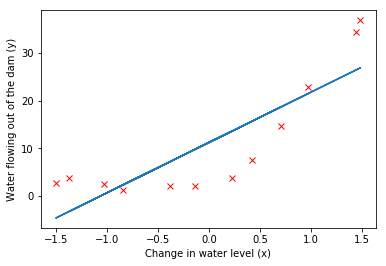

In [95]:
plt.plot(X, y, 'rx', X, np.dot(np.insert(X, 0, 1, axis=1), model_weights))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()